<img src="Archivos/miia.jpg" width=800x>

# Laboratorio 2

## Hito: desarrollo de una herramienta analítica usando paquetes especializados para análisis de datos en Python

Este laboratorio corresponde al 34% de la calificación total del curso y su entrega está planteada para el final de la semana 8. Su objetivo es poner en práctica las competencias adquiridas sobre el uso de los paquetes Pandas, Seaborn y Scikit Learn, entre otros, para hacer exploración, análisis descriptivo, y abordar preguntas de negocio para un caso basado en datos reales. 

Especificamente, al desarrollar este laboratorio pondrás a prueba tus habilidades para:

1. Identificar y abordar una pregunta de negocio a partir de un contexto dado.
2. Cargar datos desde archivos utilizando métodos de Pandas.
3. Explorar, manejar, limpiar y agregar DataFrames.
5. Implementar análisis combinando métricas descriptivas, visualización, filtrado y agrupación.
6. Implementar análisis basado en modelos estadísticos o de machine learning.
7. Utilizar paquetes como ipywidgets o panel para agregar interactividad a los análisis de manera sencilla.

Te recomendamos leer por completo el enunciado del laboratorio antes de comenzar, de forma que tengas claro el propósito completo de la actividad, y puedas desarrollar tu solución apuntando a él en cada paso.

##  Contexto: *Desigualdad y factores de éxito en Pruebas "Saber 11" (Colombia)*

El ICFES es el Instituto Colombiano para el Fomento de la Educación Superior y está adscrito al Ministerio de Educación a nivel nacional. Como parte de sus funciones, el ICFES administra las pruebas *Saber 11*, las cuales evalúan a todos los estudiantes del país al final de su educación secundaria. El examen contiene preguntas que evalúan una variedad de áreas del conocimiento (p.ej., matemáticas, ciencias naturales), y se lleva a cabo dos veces al año, respondiendo a los diferentes calendarios académicos que siguen las instituciones educativas. Al momento de inscribirse a las pruebas, los estudiantes deben llenar un formulario que recoge información socio-demográfica y relacionada con la institución a la que pertenecen, con el fin de obtener evidencia respecto al desempeño de los estudiantes en la prueba según sus condiciones particulares.

<img src="Archivos/saberpro.png" width=700x>

Al igual que otros países de la región, Colombia tiene grandes retos en términos de desigualdad, particularmente en el contexto de educación primaria y secundaria. Por esta razón, para el Estado colombiano es muy valioso el amplio registro de datos que el ICFES genera alrededor de las Pruebas Saber 11, pues con ellos se pueden generar análisis sobre la calidad de la educación en el país y eventualmente dar lugar a recomendaciones sobre políticas públicas. En particular, la problemática a abordar en este caso de estudio es *desigualdad y factores de éxito en las pruebas Saber 11*. 

Los objetivos de este caso de estudio son:

* Entender el contenido de los archivos de datos proporcionados sobre las pruebas Saber11, generar un reporte acerca de sus características principales, e identificar qué partes de dicho contenido serán relevantes para el análisis.
* Identificar características de las variables de interés y relaciones entre ellas, por ejemplo, a través de agrupación, visualizaciones, y descriptivos en general.
* Abordar preguntas de negocio relacionadas con la problemática planteada, particularmente con respecto a los factores que puedan incidir significativamente en el puntaje de una persona que presenta la prueba; especialmente aquellos que se relacionen con mal desempeño.
* Generar una herramienta sencilla que permita a un usuario interactuar con alguno de los análisis realizados de forma relevante en el contexto del problema.

# 1. Entender el contenido de los archivos de datos

Esta misión consiste en hacerse una idea general del contenido de los datos y seleccionar un segmento de ellos que tenga potencial para los análisis propuestos.

Pautas generales:
* Leer los archivos de datos y agregarlos según sea necesario.
* Inspeccionar el archivo a partir de su encabezado, columnas, descripciones de las variables según su tipo (numéricas, categóricas).
* Definir un sub-conjunto de variables (e.g., una lista) que puedan ser relevantes para la problemática de interés.

Preguntas guía:
* ¿Qué dimensiones tienen los datos?
* ¿Con cuántos años y periodos de evaluación se cuenta?
* ¿Cuáles variables pueden ser de interés para la problemática planteada?
* ¿Qué porcentaje de datos faltantes o no válidos hay en las columnas de interés? ¿Podría eso afectar el análisis, y cómo abordarlo?

Esta misión corresponde a trabajo interno del analista, por lo cual no tiene un entregable para el cliente. Como entregable, puedes generar un reporte básico sobre el contenido de los archivos de datos, ya sea a través de la impresión de mensajes, la presentación de tablas resumen, u otros.

#### a. Cargue de librerías

In [1]:
import numpy as np
import pandas as pd
import unidecode
import re
from unicodedata import normalize

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import datasets, linear_model
from sklearn.metrics import r2_score
from sklearn.feature_selection import SelectKBest
from sklearn import feature_selection
import ipywidgets as widgets
from ipywidgets import interactive
from datetime import datetime
from datetime import date

import panel as pn
pn.extension('plotly')

# Display más grande
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

/Users/anamariaaramendiz/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#### b. Cargue de base de datos

Se descargaron las bases de datos correspondientes a los periodos: 2019 (01 y 02), 2020 (01 y 02), teniendo en cuenta que el 2019 fue un año regular, y el 2020 con los efectos de la pandemia, pueden mostrar particularidades sobre el rendimiento, dado el cambio en el sistema de evaluación y educación (migración virtual y desigualdades evidenciadas por la falta de recursos).

(esto puede tomar un par de minutos)

In [2]:
def cargue(año):
    direccion = "./Archivos/" + año + ".TXT"
    base = pd.read_csv(direccion, sep = "¬", engine = "python", encoding = "")
    return base
    
S_20191 = cargue("SB11_20191")
S_20192 = cargue("SB11_20192")
S_20201 = cargue("SB11_20201")
S_20202 = cargue("SB11_20202")


#### c. Inspección de los archivos

- Dimensión de los archivos: los datos del 2019 tienen 1 columna más que los del 2020 (ESTU_ETNIA), y los del segundo corte del año (20XX-2), superan los 500K registros, mientras que los del primer corte (20XX-1) son menos de 22K registros.

In [3]:
def dimension(base,nombre):
    return print("Archivo",nombre,": {:,.0f} filas".format(base.shape[0]), "y",base.shape[1], "columnas")

dimension(S_20191,"2019-1")
dimension(S_20192,"2019-2")
dimension(S_20201,"2020-1")
dimension(S_20202,"2020-2")
print("La columna que no está en el 2020 es:",S_20191.columns.difference(S_20201.columns))

Archivo 2019-1 : 21,083 filas y 82 columnas
Archivo 2019-2 : 546,212 filas y 82 columnas
Archivo 2020-1 : 15,435 filas y 81 columnas
Archivo 2020-2 : 504,872 filas y 81 columnas
La columna que no está en el 2020 es: Index(['ESTU_ETNIA'], dtype='object')


- Datos faltantes: se aprecia que el total de datos faltantes por cada base de datos, varían entre el 1.27% al 3.59%, por lo que remover estos datos, no representa mayor impacto sobre el total. De igual forma, el total de columnas con faltantes va desde un 42% al 49% del total de las columnas.

In [4]:
def info_faltantes(base, nombre):
    return print("Archivo",nombre," : {:,.0f} columnas con NA's".format(len(base.columns[base.isnull().any()])), "equivalente al {:,.2%}".format(len(base.columns[base.isnull().any()])/len(base.columns)),"del total de columnas. El total de faltantes es: {:,.0f}".format(base.isna().sum().sum()), "es decir, el {:,.2%}".format(base.isna().sum().sum()/(base.shape[0]*base.shape[1])), "del total de datos")

info_faltantes(S_20191,"2019-1")
info_faltantes(S_20192,"2019-2")
info_faltantes(S_20201,"2020-1")
info_faltantes(S_20202,"2020-2")


Archivo 2019-1  : 35 columnas con NA's equivalente al 42.68% del total de columnas. El total de faltantes es: 55,525 es decir, el 3.21% del total de datos
Archivo 2019-2  : 38 columnas con NA's equivalente al 46.34% del total de columnas. El total de faltantes es: 1,241,400 es decir, el 2.77% del total de datos
Archivo 2020-1  : 37 columnas con NA's equivalente al 45.68% del total de columnas. El total de faltantes es: 44,850 es decir, el 3.59% del total de datos
Archivo 2020-2  : 40 columnas con NA's equivalente al 49.38% del total de columnas. El total de faltantes es: 519,164 es decir, el 1.27% del total de datos


#### d. Columnas a considerar

16 columnas mixtas (categóricas y numéricas), siendo:

- Categóricas: fecha de nacimiento (para tener la edad), periodo (sirve para identificar el periodo cuando se unan las bases), id del estudiante (para identificar duplicados y reconocer individualmente los registros, departamento de residencia, estrato (posiblemente relacionado con acceso a mejor educación), familia tiene internet (importante con la llegada de la pandemia, facilidad de acceso a la información), familia tiene consola de juegos (posible tiempo no dedicado al estudio), número de libros leídos (posible propensión al estudio), situación económica (posibilidad de recursos tanto de acceso a la educación, como materiales, e incluso alimentación que puede influenciar desarrollo del cerebro), dedicación a lectura diaria y dedicación a internet, naturaleza del colegio (entendiendo que la educación pública está sujeta a paros y demás), carácter del colegio (enfoque académico o práctico que puede tener una orientación que afecte el resultado), ubicación (intuyendo las dificultades de acceso a la educación en zona rural y su calidad).
    
- Numéricas: puntaje global, que para los efectos de esta revisión, se acota en el total.

In [5]:
def filtro_columnas(base):
    return base[["ESTU_FECHANACIMIENTO","PERIODO","ESTU_CONSECUTIVO","ESTU_DEPTO_RESIDE","FAMI_ESTRATOVIVIENDA","FAMI_TIENEINTERNET",
                   "FAMI_TIENECOMPUTADOR","FAMI_TIENECONSOLAVIDEOJUEGOS","FAMI_NUMLIBROS","FAMI_SITUACIONECONOMICA",
                   "ESTU_DEDICACIONLECTURADIARIA","ESTU_DEDICACIONINTERNET","COLE_NATURALEZA","COLE_CARACTER",
                   "COLE_AREA_UBICACION", "PUNT_GLOBAL"]]

F_20191 = filtro_columnas(S_20191)
F_20192 = filtro_columnas(S_20192)
F_20201 = filtro_columnas(S_20201)
F_20202 = filtro_columnas(S_20202)

Comprobación de filtro de columnas:

In [6]:
dimension(F_20191,"2019-1")
dimension(F_20192,"2019-2")
dimension(F_20201,"2020-1")
dimension(F_20202,"2020-2")

Archivo 2019-1 : 21,083 filas y 16 columnas
Archivo 2019-2 : 546,212 filas y 16 columnas
Archivo 2020-1 : 15,435 filas y 16 columnas
Archivo 2020-2 : 504,872 filas y 16 columnas


#### e. Unión de las bases de datos

In [7]:
bases = [F_20191, F_20192, F_20201, F_20202]
saber_t = pd.DataFrame()
for df in bases:
    saber_t = saber_t.append(df)    

In [8]:
dimension(saber_t,"base a trabajar")

Archivo base a trabajar : 1,087,602 filas y 16 columnas


In [9]:
saber_t.head()

,ESTU_FECHANACIMIENTO,PERIODO,ESTU_CONSECUTIVO,ESTU_DEPTO_RESIDE,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_TIENECOMPUTADOR,FAMI_TIENECONSOLAVIDEOJUEGOS,FAMI_NUMLIBROS,FAMI_SITUACIONECONOMICA,ESTU_DEDICACIONLECTURADIARIA,ESTU_DEDICACIONINTERNET,COLE_NATURALEZA,COLE_CARACTER,COLE_AREA_UBICACION,PUNT_GLOBAL
0,07/12/2000,20191,SB11201910008548,VALLE,Estrato 4,Si,Si,No,0 A 10 LIBROS,Mejor,Entre 1 y 2 horas,Entre 1 y 3 horas,OFICIAL,TÉCNICO/ACADÉMICO,URBANO,235
1,23/03/1998,20191,SB11201910004475,VALLE,Estrato 3,Si,No,No,11 A 25 LIBROS,Mejor,No leo por entretenimiento,Entre 1 y 3 horas,OFICIAL,TÉCNICO/ACADÉMICO,URBANO,217
2,22/03/2001,20191,SB11201910011427,VALLE,Estrato 2,Si,No,Si,0 A 10 LIBROS,Igual,No leo por entretenimiento,30 minutos o menos,OFICIAL,TÉCNICO/ACADÉMICO,URBANO,246
3,16/06/1994,20191,SB11201910041975,VALLE,Estrato 2,Si,Si,No,0 A 10 LIBROS,Igual,No leo por entretenimiento,Más de 3 horas,OFICIAL,TÉCNICO/ACADÉMICO,URBANO,255
4,21/09/2000,20191,SB11201910014490,BOGOTA,Estrato 6,Si,Si,Si,MÁS DE 100 LIBROS,Igual,Entre 1 y 2 horas,Entre 1 y 3 horas,NO OFICIAL,ACADÉMICO,URBANO,280


- Con la nueva base, se evalúan los faltantes de nuevo, ya que varias columnas fueron removidas. Se encuentra que 10 de las 15 columnas presentan faltantes, y que el total de faltantes llega al 2.36% del total de datos de la base.

In [10]:
info_faltantes(saber_t, "base a trabajar")

Archivo base a trabajar  : 10 columnas con NA's equivalente al 62.50% del total de columnas. El total de faltantes es: 410,199 es decir, el 2.36% del total de datos


Se procede a eliminar los faltantes de la base, que representan menos del 3% del total de los datos a disposición.

In [11]:
def remover(base):
    return base.dropna()

saber = remover(saber_t)

In [12]:
dimension(saber,"base final")

Archivo base final : 957,658 filas y 16 columnas


In [13]:
info_faltantes(saber, "base final")

Archivo base final  : 0 columnas con NA's equivalente al 0.00% del total de columnas. El total de faltantes es: 0 es decir, el 0.00% del total de datos


In [14]:
saber.head()

,ESTU_FECHANACIMIENTO,PERIODO,ESTU_CONSECUTIVO,ESTU_DEPTO_RESIDE,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_TIENECOMPUTADOR,FAMI_TIENECONSOLAVIDEOJUEGOS,FAMI_NUMLIBROS,FAMI_SITUACIONECONOMICA,ESTU_DEDICACIONLECTURADIARIA,ESTU_DEDICACIONINTERNET,COLE_NATURALEZA,COLE_CARACTER,COLE_AREA_UBICACION,PUNT_GLOBAL
0,07/12/2000,20191,SB11201910008548,VALLE,Estrato 4,Si,Si,No,0 A 10 LIBROS,Mejor,Entre 1 y 2 horas,Entre 1 y 3 horas,OFICIAL,TÉCNICO/ACADÉMICO,URBANO,235
1,23/03/1998,20191,SB11201910004475,VALLE,Estrato 3,Si,No,No,11 A 25 LIBROS,Mejor,No leo por entretenimiento,Entre 1 y 3 horas,OFICIAL,TÉCNICO/ACADÉMICO,URBANO,217
2,22/03/2001,20191,SB11201910011427,VALLE,Estrato 2,Si,No,Si,0 A 10 LIBROS,Igual,No leo por entretenimiento,30 minutos o menos,OFICIAL,TÉCNICO/ACADÉMICO,URBANO,246
3,16/06/1994,20191,SB11201910041975,VALLE,Estrato 2,Si,Si,No,0 A 10 LIBROS,Igual,No leo por entretenimiento,Más de 3 horas,OFICIAL,TÉCNICO/ACADÉMICO,URBANO,255
4,21/09/2000,20191,SB11201910014490,BOGOTA,Estrato 6,Si,Si,Si,MÁS DE 100 LIBROS,Igual,Entre 1 y 2 horas,Entre 1 y 3 horas,NO OFICIAL,ACADÉMICO,URBANO,280


#### f. Transformación de columnas y demás información

Con el fin de faciliar en adelante la redacción del código, se procede a renombrar las columnas, crear una nueva columna llamada Edad, convertir valores a minúsculas, quitar tildes, entre otros.

- renombrar columnas:

In [15]:
saber = saber.rename(columns = {"ESTU_FECHANACIMIENTO": "Nacimiento", "PERIODO": "Periodo", "ESTU_CONSECUTIVO":"Id",
                                "ESTU_DEPTO_RESIDE": "Departamento","FAMI_ESTRATOVIVIENDA":"Estrato", 
                                "FAMI_TIENEINTERNET":"Internet","FAMI_TIENECOMPUTADOR":"Computador",
                                "FAMI_TIENECONSOLAVIDEOJUEGOS":"Videojuegos", "FAMI_NUMLIBROS":"Libros", 
                                "FAMI_SITUACIONECONOMICA":"Economia","ESTU_DEDICACIONLECTURADIARIA":"DLectura",
                                "ESTU_DEDICACIONINTERNET":"DInternet", "COLE_NATURALEZA":"Tipo",
                                "COLE_CARACTER":"Enfasis", "COLE_AREA_UBICACION":"Ubicacion", "PUNT_GLOBAL":"Puntaje"})

In [16]:
saber = saber.set_index("Id")

* Incluir una columna que sea Edad, según la fecha de nacimiento y el día actual:

In [17]:
saber["Nacimiento"] = pd.to_datetime(saber["Nacimiento"], errors = 'coerce')

In [18]:
saber["Edad"] = saber["Nacimiento"].apply(lambda x : (pd.datetime.now().year - x.year))
saber = saber.drop("Nacimiento", 1)

/Users/anamariaaramendiz/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.


   - Como algunos datos pueden ser 0, se procede a verificar:

In [19]:
info_faltantes(saber, "base final")

Archivo base final  : 1 columnas con NA's equivalente al 6.67% del total de columnas. El total de faltantes es: 3,221 es decir, el 0.02% del total de datos


   - Se depura nuevamente la base, con esos 0.02% de registros en Nan

In [20]:
def remover(base):
    return base.dropna()

saber = remover(saber)

In [21]:
dimension(saber,"base final")

Archivo base final : 954,437 filas y 15 columnas


- Como hay datos que son outliers, procedentes de la fecha de registro de nacimiento, que pudo ser un error en la base de datos, se verifica con estadísticos:

In [22]:
def estadisticos(columna):
    media = np.mean(saber[columna])
    mediana = np.median(saber[columna])
    maximo = max(saber[columna])
    minimo = min(saber[columna])
    return print("Media: {:,.2f} ".format(media),"Mediana: {:,.2f} ".format(mediana),"Máx.: {:,.2f} ".format(maximo),
                "Mín.: {:,.2f} ".format(minimo))

estadisticos("Edad")

Media: 19.30  Mediana: 19.00  Máx.: 121.00  Mín.: 1.00 


   - Teniendo en cuenta que el valor máximo de edad es 121, y el mínimo es 1, se procede a revisar los cuantiles, dejando un rango de edad de 15 a 42 años, los que no pertenezcan a ese rango, serán imputados con la media.

In [23]:
saber.Edad.dropna().quantile([0.0009, 0.995])

0.0009    15.0
0.9950    42.0
Name: Edad, dtype: float64

- Imputación con la media para la columna edad:

In [24]:
saber["Edad"] = saber["Edad"].astype("int")

In [25]:
# Rango de 0 a 14 años
saber["Edad"] = saber["Edad"].mask(saber["Edad"].between(0, 14))
saber["Edad"] = saber["Edad"].fillna(np.mean(saber["Edad"]))
# Rango de +42 años
saber["Edad"] = saber["Edad"].mask(saber["Edad"].between(43, 121))
saber["Edad"] = saber["Edad"].fillna(np.mean(saber["Edad"]))
saber["Edad"] = saber["Edad"].astype("int")

- Convertir los datos a minúsculas:

In [26]:
saber = saber.applymap(lambda s:s.lower() if type(s) == str else s)

- Quitarle a los datos de la columna Estrato, la configuración ej. "estrato 4", para dejarla en valor numérico ej. "4"; como hay faltantes, se imputan estos con el promedio de estrato (2):

In [27]:
saber["Estrato"] = saber.Estrato.str.extract('(\d+)')
saber["Estrato"] = saber["Estrato"].dropna().astype("int")

In [28]:
estadisticos("Estrato")

Media: 2.12  Mediana: nan  Máx.: 6.00  Mín.: 1.00 


In [29]:
saber["Estrato"] = saber["Estrato"].fillna(2)

- Quitar tildes de todos los registros de departamento:

In [30]:
saber["Departamento"] = saber["Departamento"].str.normalize('NFKD')\
       .str.encode('ascii', errors='ignore')\
       .str.decode('utf-8')

#### g. Conversión a variables dummies

Para poder aplicar los modelos y correlación entre variables, se genera una nueva base de datos con variables dummy, según las categorías de cada columna.

In [31]:
columnas_transform = ["Periodo","Departamento", "Internet", "Computador", "Videojuegos", "Libros", "Economia", "DLectura", "DInternet", "Tipo", "Enfasis",
                     "Ubicacion"]

def transforma_dummy(listado,base):
    saber_modif = pd.DataFrame()
    for i in listado:
        saber_modif[i] = base[i].astype('category')
        saber_modif[i] = saber_modif[i].cat.codes
    
    return saber_modif


In [32]:
saber_d = transforma_dummy(columnas_transform,saber)

In [33]:
column_add = ["Estrato", "Puntaje", "Edad"]

def add_columns(listado, base_nueva, base_anterior):
    for i in listado:
        base_nueva[i] = base_anterior[i] 
    return base_nueva

In [34]:
saber_d = add_columns(column_add,saber_d,saber)
saber_d

,Periodo,Departamento,Internet,Computador,Videojuegos,Libros,Economia,DLectura,DInternet,Tipo,Enfasis,Ubicacion,Estrato,Puntaje,Edad
SB11201910008548,0,31,1,1,0,0,1,1,1,1,3,1,4.0,235,21
SB11201910004475,0,31,1,0,0,1,1,4,1,1,3,1,3.0,217,23
SB11201910011427,0,31,1,0,1,0,0,4,0,1,3,1,2.0,246,20
SB11201910041975,0,31,1,1,0,0,0,4,3,1,3,1,2.0,255,27
SB11201910014490,0,4,1,1,1,3,0,1,1,0,0,1,6.0,280,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SB11202040573583,3,14,1,1,0,0,0,4,2,1,3,1,2.0,269,19
SB11202040573626,3,9,1,1,0,0,0,4,3,1,0,1,2.0,262,19
SB11202040573636,3,9,0,0,0,0,0,4,4,1,0,1,1.0,198,20
SB11202040573651,3,9,0,0,1,0,2,0,0,1,0,1,1.0,164,19


In [35]:
dimension(saber_d,"base final")

Archivo base final : 954,437 filas y 15 columnas


In [36]:
saber_d = saber_d.astype(int)
saber_d.dtypes

Periodo         int64
Departamento    int64
Internet        int64
Computador      int64
Videojuegos     int64
Libros          int64
Economia        int64
DLectura        int64
DInternet       int64
Tipo            int64
Enfasis         int64
Ubicacion       int64
Estrato         int64
Puntaje         int64
Edad            int64
dtype: object

### Generalidades

Se trabajará con una base de datos que contiene 16 columnas, 1 de las cuales se asignó al índice, dejando 15 disponibles para el análisis, con un total de 954.437 registros.

Se verificaron los duplicados a partir de la columna "Id", encontrando 0 registros, por lo que no se tiene en cuenta el código.

In [37]:
dimension(saber,"base final")

Archivo base final : 954,437 filas y 15 columnas


In [38]:
saber.head()

,Periodo,Departamento,Estrato,Internet,Computador,Videojuegos,Libros,Economia,DLectura,DInternet,Tipo,Enfasis,Ubicacion,Puntaje,Edad
Id,,,,,,,,,,,,,,,
SB11201910008548,20191,valle,4.0,si,si,no,0 a 10 libros,mejor,entre 1 y 2 horas,entre 1 y 3 horas,oficial,técnico/académico,urbano,235,21
SB11201910004475,20191,valle,3.0,si,no,no,11 a 25 libros,mejor,no leo por entretenimiento,entre 1 y 3 horas,oficial,técnico/académico,urbano,217,23
SB11201910011427,20191,valle,2.0,si,no,si,0 a 10 libros,igual,no leo por entretenimiento,30 minutos o menos,oficial,técnico/académico,urbano,246,20
SB11201910041975,20191,valle,2.0,si,si,no,0 a 10 libros,igual,no leo por entretenimiento,más de 3 horas,oficial,técnico/académico,urbano,255,27
SB11201910014490,20191,bogota,6.0,si,si,si,más de 100 libros,igual,entre 1 y 2 horas,entre 1 y 3 horas,no oficial,académico,urbano,280,21


# 2. Identificar características y relaciones en las variables

Esta misión consiste en utilizar análisis descriptivos para explorar patrones o relaciones en las variables de interés para la problemática planteada.

Pautas generales:
* Utilizar Matplotlib y/o Seaborn para inspeccionar visualmente variables de interés; los métodos `distplot`, `pairplot`, `boxplot`, o `violinplot`, entre otros, pueden ser de utilidad.
* Utilizar el método `groupby` de Pandas, en conjunto con la visualización, para proveer evidencia sobre el impacto de variables socio-demográficas de interés sobre el desempeño de los estudiantes en la prueba.

Preguntas guía:
* ¿Hay patrones de interés en las distribuciones de las variables, o en las relaciones entre ellas?
* ¿Existe algún impacto significativo de variables socio-demográficas en los puntajes globales o por área?
* ¿Sobre cuáles variables vale la pena hacer un análisis más profundo?

El entregable de esta misión es un reporte (p.ej., un conjunto de visualizaciones) que de cuenta de los comportamientos más interesantes que se observen en las variables de interés para el contexto propuesto. El propósito de esta exploración es generar hipótesis o preguntas que guíen análisis más profundos. En ese sentido, con base en lo aprendido en esta sección, identifique las tres preguntas analíticas que plantearía con mayor prioridad, teniendo en cuenta el contexto y los datos disponibles; estas preguntas NO se deben abordar en términos de código para el laboratorio (únicamente formularse).

#### a. Visualización de datos por cada variable considerada

- Datos de tipo numérico:
    - Distribución: La edad evidentemente se centra en los 19 años. En cuanto al puntaje, parece tener una distribución normal, con una media en 250 puntos, un máximo de 500 (puntaje perfecto) a 0 (quizás inscrito sin responder). En cuanto al estrato, el más representativo es el estrato 2.

In [39]:
estadisticos("Edad")
estadisticos("Puntaje")
estadisticos("Estrato")

Media: 19.02  Mediana: 19.00  Máx.: 42.00  Mín.: 15.00 
Media: 250.85  Mediana: 247.00  Máx.: 500.00  Mín.: 0.00 
Media: 2.11  Mediana: 2.00  Máx.: 6.00  Mín.: 1.00 


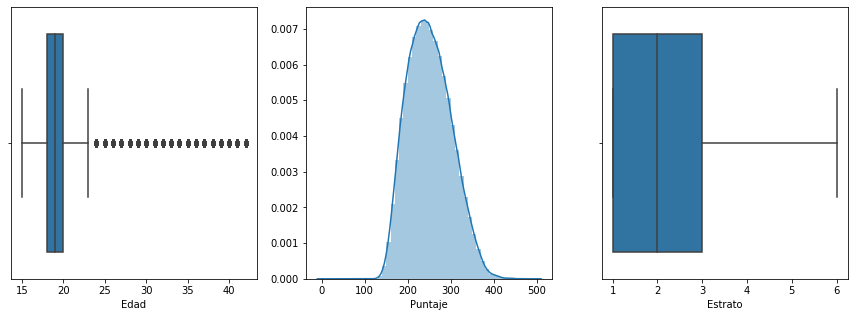

In [40]:
plt.figure(figsize=(15, 5))
plt.subplot(131)
distr1 = sns.boxplot(saber["Edad"])
plt.subplot(132)
distr2 = sns.distplot(saber["Puntaje"])
plt.subplot(133)
distr3 = sns.boxplot(saber["Estrato"])

- Datos de tipo categórico, relacionados con el puntaje:

Internet en casa: se puede ver que del total de personas consideradas en este análisis, un 30.8% no cuenta con internet en su lugar de residencia.

Computador en casa: similar que el internet, 37% de las personas analizadas, no cuentan con un computador en casa.

Consola de videojuegos: la gran mayoría no cuenta con este tipo de dispositivos, por lo que puede ser un factor que no influencie el resultado de la prueba.

/Users/anamariaaramendiz/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


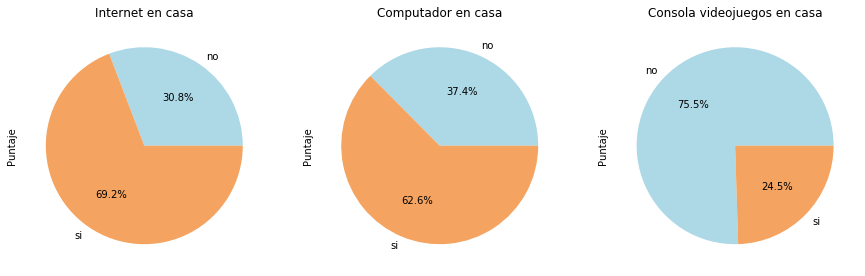

In [41]:
plt.figure(figsize=(15, 5))
plt.subplot(131)
colors = ["lightblue","sandybrown"]

plt.subplot(131)
Inter = saber.groupby("Internet")["Puntaje"].sum()
distr4 = Inter.plot.pie(autopct="%.1f%%", colors = colors)
plt.title("Internet en casa")

plt.subplot(132)
Compu = saber.groupby("Computador")["Puntaje"].sum()
distr5 = Compu.plot.pie(autopct="%.1f%%", colors = colors)
plt.title("Computador en casa")

plt.subplot(133)
Video = saber.groupby("Videojuegos")["Puntaje"].sum()
distr5 = Video.plot.pie(autopct="%.1f%%", colors = colors)
plt.title("Consola videojuegos en casa")

plt.show()

#### b. Visualización de datos vs. puntaje

In [42]:
def grafico(columna,base):
    labels = list(base[columna])
    datos = list(base["Puntaje"])
    return sns.boxplot(x = labels , y = datos)

##### Variables relacionadas con posibles accesos a recursos

 - Se encuentra que quienes tienen internet, computador, y consola de videojuegos en casa, tienen un promedio de puntaje obtenido en la prueba más alto que quienes no, siendo entonces la consola de videojuegos probablemente más relacionada con el estrato y nivel de acceso a recursos que pueden posibilitar acceder a una mejor calidad, que el impacto sobre la dedicación en el estudio.

##### Acceso a recursos tecnológicos

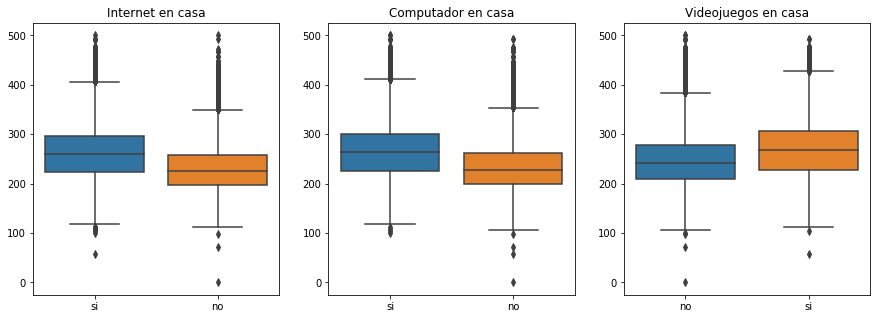

In [43]:
plt.figure(figsize=(15, 5))

plt.subplot(131)
distr6 = grafico("Internet",saber)
plt.title("Internet en casa")

plt.subplot(132)
distr7 = grafico("Computador",saber)
plt.title("Computador en casa")

plt.subplot(133)
distr8 = grafico("Videojuegos",saber)
plt.title("Videojuegos en casa")

plt.show()

##### Aprovechamiento de recursos y disponibilidad (relacionados con lo académico)

Tener en la casa mayor cantidad de libros, al parecer si afecta el rendimiento, con una media más alta en promedio del puntaje de los que tienen más de 100 libros.

En cuanto a dedicación a la lectura, quienes leen más de 30 minutos en adelante, presentan un promedio más alto que quienes leen menos, y aparentemente una media de calificación similar.

Para la dedicación en internet, quienes navegan más de 30 minutos si presentan un promedio en el puntaje más alto, que quienes no tienen acceso a internet o lo hace en menor medida.

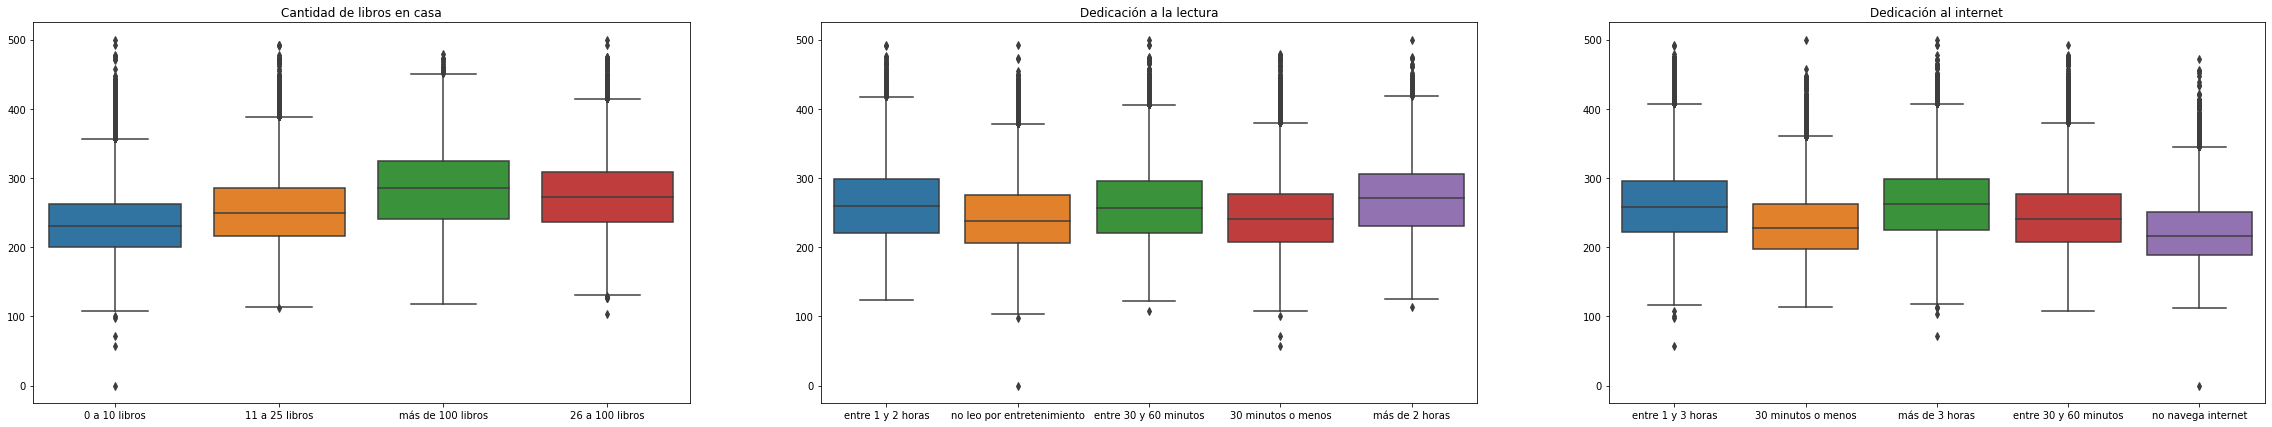

In [44]:
plt.figure(figsize=(40, 7))

plt.subplot(131)
distr6 = grafico("Libros",saber)
plt.title("Cantidad de libros en casa")

plt.subplot(132)
distr7 = grafico("DLectura",saber)
plt.title("Dedicación a la lectura")

plt.subplot(133)
distr7 = grafico("DInternet",saber)
plt.title("Dedicación al internet")


plt.show()

##### Características de la institución académica

En cuanto a las instituciones que son privadas, se evidencia que la media de la puntuación obtenida es más alta respecto a las oficiales

En un enfoque académico por encima del técnico, tiene mejor media en el puntaje.

Y las instituciones que están en el casco urbano, tienen mejor promedio de puntaje que las instituciones rurales.

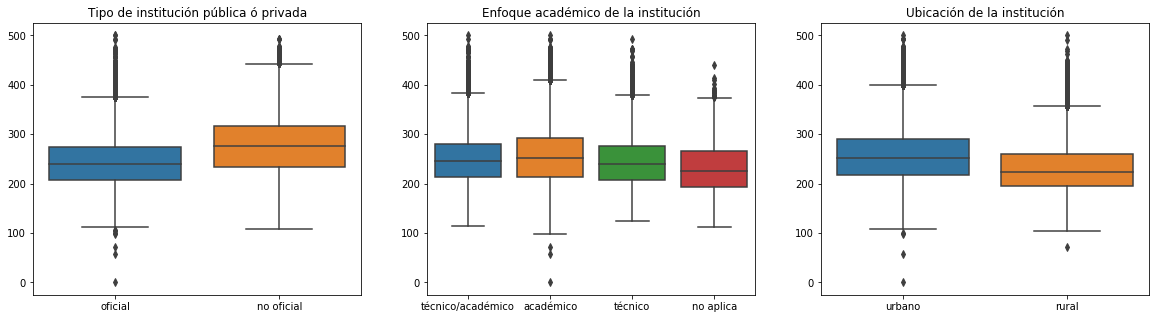

In [45]:
plt.figure(figsize=(20, 5))

plt.subplot(131)
distr6 = grafico("Tipo",saber)
plt.title("Tipo de institución pública ó privada")

plt.subplot(132)
distr7 = grafico("Enfasis",saber)
plt.title("Enfoque académico de la institución")

plt.subplot(133)
distr8 = grafico("Ubicacion",saber)
plt.title("Ubicación de la institución")

plt.show()

##### Localización geográfica en Colombia

Los estudiantes que presentaron la prueba en Bogotá, Santander y Norte de Santander aparentan sobresalir en el promedio del puntaje obtenido, por otro lado, los departamentos de Chocó, Vaupés, Amazonas se observan con un promedio bajo respecto al resto de departamentos.

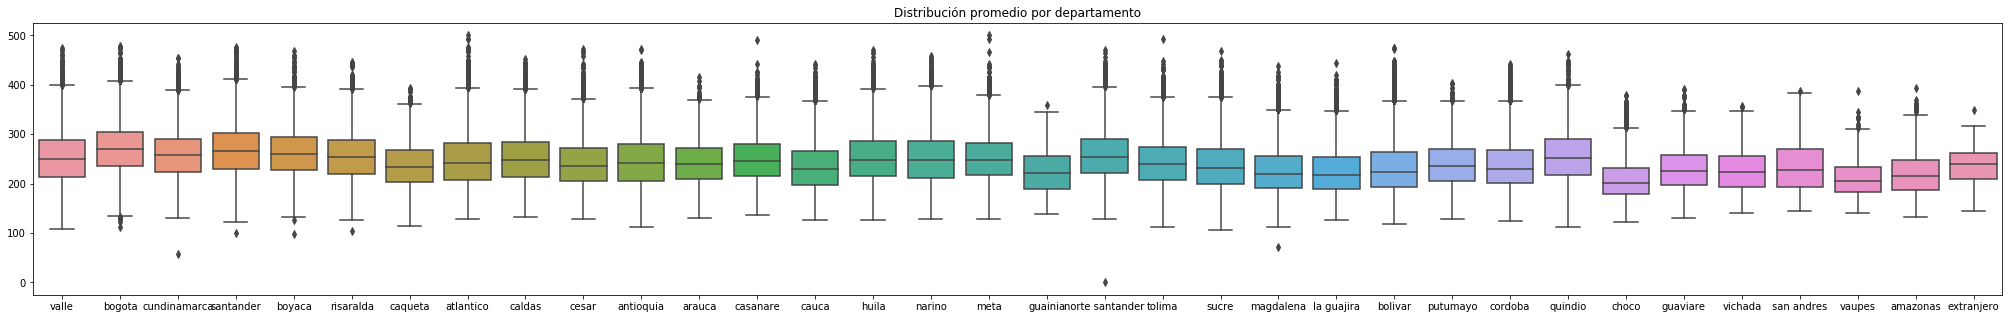

In [46]:
plt.figure(figsize =(120, 5))

plt.subplot(131)
distr6 = grafico("Departamento",saber)
plt.title("Distribución promedio por departamento")
plt.show()

##### Características Económicas

 - La calificación de nivel económico puede ser influenciada por una percepción no acotada en características específicas, también por la entrada de la pandemia que generalizó la situación de desmejora a muchos hogares, con lo que se encuentra que ha pesar de tener "peor condición", la media del puntaje es ligeramente mejor que los que consideran que su condición económica es igual o mejor. Frente a esto, el estrato si evidencia un mejor comportamiento y aparentemente una diferencia entre medias y cuartiles.

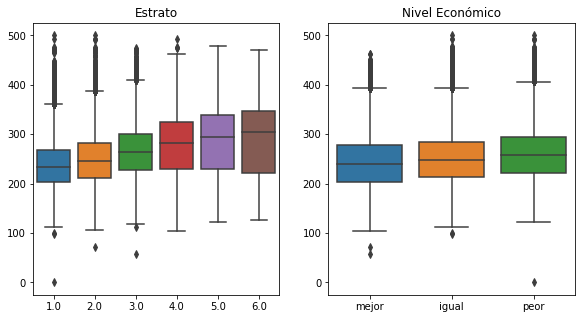

In [47]:
plt.figure(figsize=(15, 5))

plt.subplot(131)
distr6 = grafico("Estrato",saber)
plt.title("Estrato")

plt.subplot(132)
distr7 = grafico("Economia",saber)
plt.title("Nivel Económico")

plt.show()

##### Características del estudiante

- Si bien la mayor parte de las personas que presentaron el examen oscilan los 17 años, entre más edad tenga la persona, aparenta tener un puntaje menor en la prueba, siendo que quienes tienen entre 16 a 18 años, tienen el promedio de puntaje más alto.

- En cuanto al periodo de presentación de la prueba, quienes lo presentan en el primer periodo aparentan tener mejor puntaje que quienes lo hacen en el segundo.

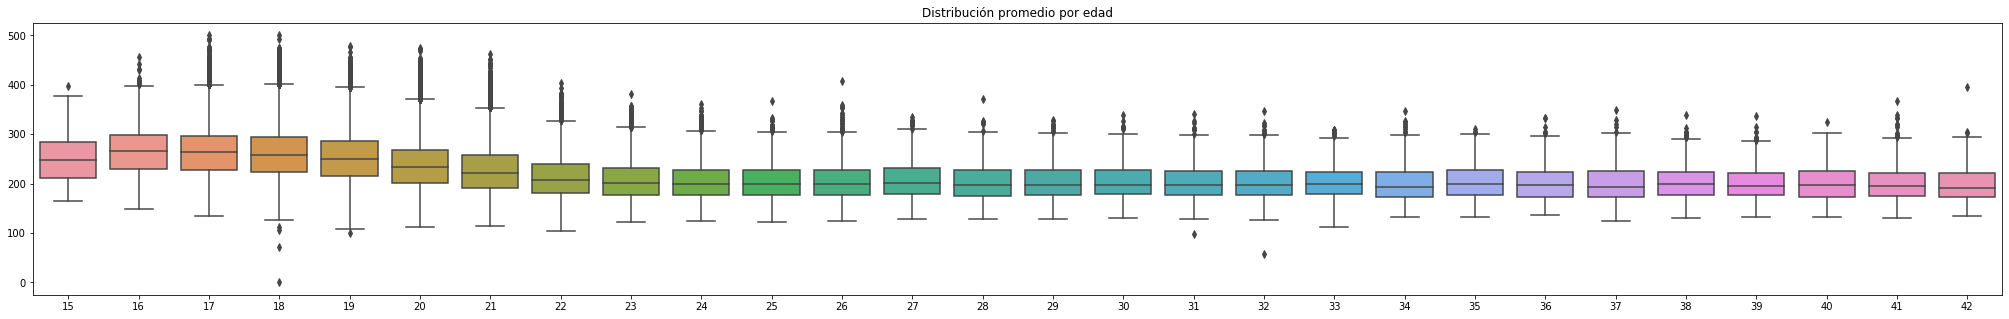

In [48]:
plt.figure(figsize =(120, 5))

plt.subplot(131)
distr6 = grafico("Edad",saber)
plt.title("Distribución promedio por edad")
plt.show()

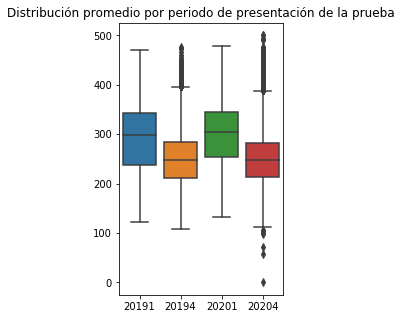

In [49]:
plt.figure(figsize =(10, 5))

plt.subplot(131)
distr6 = grafico("Periodo",saber)
plt.title("Distribución promedio por periodo de presentación de la prueba")
plt.show()

#### c. Gráfico de correlación entre variables

Según lo que se puede ver en la matriz de correlación, así como en el diagrama, tener computador se relaciona altamente con internet, y siendo que la dedicación a internet incluye una columna que indica que no se tiene internet, se pueden dejar de considerar las variables computador y dedicación a internet, para dejar internet que tiene ligeramente menor correlación respecto al puntaje que computador, pero consolida las variables de recursos tecnológicos.

Nivel económico (percepción), es mejor explicada por el estrato, por lo que se dejará sólo el estrato; de igual forma, videojuegos tiene la correlación de pearson más alta respecto al estrato, entonces también se descarta, siendo que puede ser explicada por el estrato.

Por el lado de los libros y la cantidad de libros en casa, entre estas variables no se aprecia que estén fuertemente correlacionadas, esto quiere decir que tener libros no es garantía que haya una dedicación a ellos, sin embargo libros tiene más correlación respecto al puntaje que la dedicación, por lo que se decide dejar la variable libros.

Por último, el periodo tiene una alta correlación con la edad, por lo que se descarta esta variable.

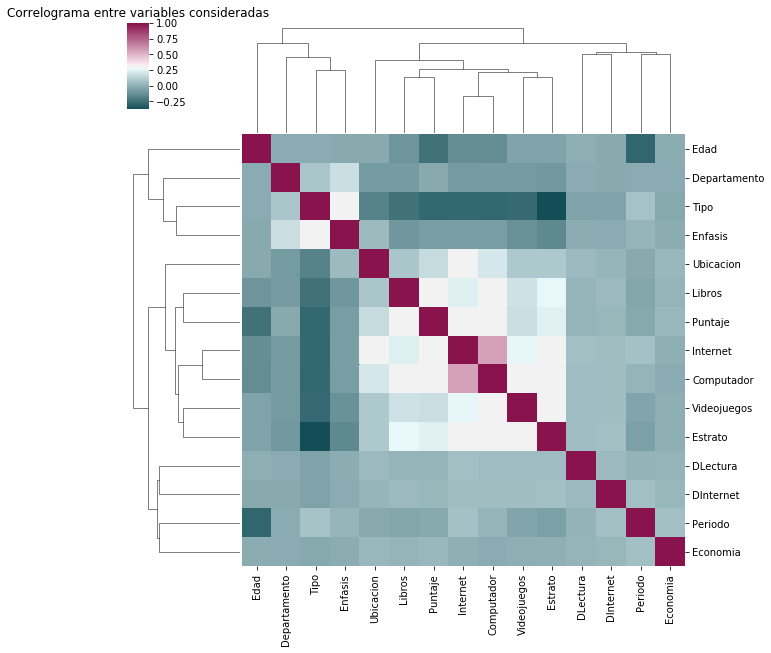

In [50]:
cmap = sns.diverging_palette(h_neg=210, h_pos=350, s=90, l=30, as_cmap=True, center="light")
sns.clustermap(saber_d.corr(), figsize=(10, 10), cmap=cmap)
plt.title("Correlograma entre variables consideradas")
plt.show()

- Matriz de correlación de pearson de las variables seleccionadas:

In [51]:
corr_matrix = saber_d.corr(method='pearson')
corr_matrix

,Periodo,Departamento,Internet,Computador,Videojuegos,Libros,Economia,DLectura,DInternet,Tipo,Enfasis,Ubicacion,Estrato,Puntaje,Edad
Periodo,1.000000,-0.012409,0.070147,0.020473,-0.040237,-0.034318,0.064974,0.014741,0.062929,0.073713,0.025733,-0.016671,-0.054836,-0.025210,-0.274620
Departamento,-0.012409,1.000000,-0.076674,-0.071358,-0.078326,-0.073838,-0.011002,-0.012106,-0.015989,0.083441,0.183857,-0.074686,-0.086284,-0.018592,-0.014387
Internet,0.070147,-0.076674,1.000000,0.559935,0.274495,0.246376,0.001598,0.061649,0.059731,-0.268907,-0.062840,0.290392,0.330467,0.302116,-0.123468
Computador,0.020473,-0.071358,0.559935,1.000000,0.296217,0.291621,-0.010196,0.050860,0.054933,-0.267470,-0.065597,0.216228,0.328112,0.312164,-0.132085
Videojuegos,-0.040237,-0.078326,0.274495,0.296217,1.000000,0.198442,-0.003364,0.053248,0.059949,-0.266288,-0.108585,0.099780,0.328688,0.184059,-0.043177
Libros,-0.034318,-0.073838,0.246376,0.291621,0.198442,1.000000,0.017440,0.017720,0.040005,-0.232019,-0.092735,0.088924,0.276728,0.330724,-0.100443
Economia,0.064974,-0.011002,0.001598,-0.010196,-0.003364,0.017440,1.000000,0.017741,0.031111,-0.023512,-0.006808,0.033416,0.005823,0.035250,-0.005592
DLectura,0.014741,-0.012106,0.061649,0.050860,0.053248,0.017720,0.017741,1.000000,0.042582,-0.046610,-0.007879,0.039882,0.050626,0.019989,-0.001957
DInternet,0.062929,-0.015989,0.059731,0.054933,0.059949,0.040005,0.031111,0.042582,1.000000,-0.046448,-0.013321,0.023217,0.061178,0.032896,-0.017913
Tipo,0.073713,0.083441,-0.268907,-0.267470,-0.266288,-0.232019,-0.023512,-0.046610,-0.046448,1.000000,0.333500,-0.168530,-0.374788,-0.270300,-0.011269


### Generalidades

Para proceder con los modelos, se sugiere tener en cuenta las siguientes variables: puntaje, edad, estrato, departamento, internet, libros, ubicación, tipo, enfasis

In [52]:
saber_final = saber_d[["Puntaje", "Edad", "Estrato", "Departamento", "Internet", "Libros", "Ubicacion", "Tipo", "Enfasis"]]
saber_final.head()

,Puntaje,Edad,Estrato,Departamento,Internet,Libros,Ubicacion,Tipo,Enfasis
SB11201910008548,235,21,4,31,1,0,1,1,3
SB11201910004475,217,23,3,31,1,1,1,1,3
SB11201910011427,246,20,2,31,1,0,1,1,3
SB11201910041975,255,27,2,31,1,0,1,1,3
SB11201910014490,280,21,6,4,1,3,1,0,0


Se decide trabajar con 9 variables, de las cuales 8 son predictoras y/o independientes.

In [53]:
dimension(saber_final,"base con variables seleccionadas")

Archivo base con variables seleccionadas : 954,437 filas y 9 columnas


- preguntas de analíticas:

a. ¿ Tener internet influye en el proceso de educación de un estudiante, al punto de afectar su rendimiento en las pruebas saber?: esta pregunta surge dado que hace apenas menos de 20 años, el modelo de educación no contaba con estos avances tecnológicos, sin embargo, las estrategias de enseñanza se adaptaban a los recursos disponibles.

b. ¿ La edad, que naturalmente se puede considerar como un grado de madurez multinivel, especialmente mental, puede influir en los resultados de la prueba?.

c. ¿Es el departamento el factor clave frente al nivel educativo en las instituciones, ó por el contrario esto se determina más por el estrato y las facilidades de acceso a la educación?.

d. ¿Tener libros en casa, como creencia de influencia positiva para la persona ante el aprendizaje, realmente afecta el rendimiento de un estudiante ante una prueba?.

e. ¿El tipo de enfoque en la educación que ofrece una institución, determina el éxito en los parámetros de la prueba?, ¿Es la prueba significativa para aquellas personas que tienen formación técnica pero están siendo preparados para el mundo laboral en la practicidad?.

f. ¿Los problemas sociales derivados de insatisfacciones colectivas, principalmente el apoyo del gobierno al docente y las instituciones mediante recursos, puede afectar el resultado de la prueba de los estudiantes de planteles supeditados a la educación pública?.

# 3. Abordar preguntas de negocio planteadas

Esta misión consiste en proponer, implementar y evaluar el desempeño modelo(s) que busque(n) explicar las relaciones entre factores socio-demográficos y desempeño en la prueba.

Pautas generales:
* Seleccionar variables y proponer modelos acordes a dichas variables y al contexto del problema.
* Utilizar los paquetes StatsModels y Scikit Learn para indagar sobre los aspectos que contribuyen al éxito de los estudiantes. Particularmente, las clases correspondientes a regresión lineal y regresión logística, entre otras, pueden ser útiles.
* Utilizar las métricas de evaluación de desempeño (disponibles en los paquetes mencionados), para concluir sobre la validez de los modelos propuestos.

Preguntas guía:
* ¿Existe algún sub-conjunto de variables socio-demográficas que explique razonablemente bien el desempeño de los estudiantes en la prueba?
* Definiendo como "estudiante en riesgo" a quien tenga un puntaje por debajo del percentil $\alpha$ en más de la mitad de las áreas de la prueba, ¿cuáles variables socio-demográficas permitirían "predecir" si un estudiante pertenecerá a dicho grupo?

El entregable de esta misión es un reporte sobre el desempeño de los modelos propuestos para abordar al menos una de las preguntas guía planteadas, acompañado de una conclusión sobre los resultados del modelo (si son válidos) en el contexto de la problemática planteada.

#### a. Definición de la función de regresión:

- Función que ejecuta la regresión dependiendo de si es lineal o logit:

In [54]:
def regresion(base,tipo_regresion, dependiente):
    
    # Variables independientes
    X = base.drop([dependiente], axis = 1).values
    # Variables dependientes
    y = base[dependiente].values
    #Dividir la base de datos en entrenamiento y test: se deja el test en 30%:
    x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)
    #Entrenamiento del modelo:
    if tipo_regresion == "lineal":
        lm_saber = linear_model.LinearRegression()
    elif tipo_regresion == "logistica":
        lm_saber = LogisticRegression()
    
    else:
        print("Sólo se acepta por parámetro lineal o logistica")
     
    lm_saber.fit(x_train, y_train)
    
    # Predicción de los resultados del los datos test:
    y_pred = lm_saber.predict(x_test)
    eva = lm_saber.score(x_test, y_test)
    
    return [eva, x_train, y_train, x_test]

#### a. Implementación de un modelo de regresión lineal múltiple con todas las variables inicialmente seleccionadas:

- Regresión con 15 variables independientes.

In [55]:
base = saber_d
regresion(base,"lineal", "Puntaje")[0]

0.2411428808190339

#### Conclusión del modelo

De acuerdo con el R2 que arroja el modelo con todas las variables escogidas inicialmente, el puntaje sólo es explicado en un 24.21%, por lo que se deben realizar otros modelos, descartando variables que no aportan significancia. 

#### b. Selección de variables por correlación:

Código fuente: https://machinelearningmastery.com/feature-selection-for-regression-data/

In [56]:
x_train = regresion(base,"lineal","Puntaje")[1]
y_train = regresion(base,"lineal","Puntaje")[2]
x_test = regresion(base,"lineal","Puntaje")[3]

fs = SelectKBest(score_func = feature_selection.f_regression, k = "all")
fs.fit(x_train, y_train)
x_train_fs = fs.transform(x_train)
x_test_fs = fs.transform(x_test)

- La gráfica muestra, que las variables: periodo, departamento, economía, dedicación a lectura e internet y énfasis, no ofrecen significancia para explicar el puntaje, por lo que se retiran para volver a correr el modelo.

Feature 0: 0.002349
Feature 1: 0.415943
Feature 2: 0.016683
Feature 3: 1.806181
Feature 4: 1.140558
Feature 5: 2.685248
Feature 6: 0.007891
Feature 7: 0.295930
Feature 8: 0.375500
Feature 9: 0.107482
Feature 10: 2.421825
Feature 11: 0.018741
Feature 12: 0.349123
Feature 13: 0.395372


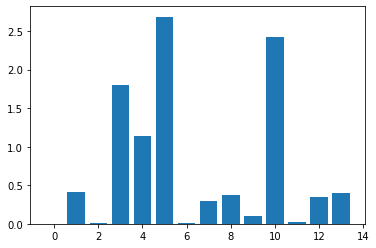

In [57]:
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))

# Gráfica de los scores:    
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

#### c. Implementación de un modelo de regresión lineal múltiple con las variables correlacionadas:

In [58]:
saber_final = saber_d[["Puntaje", "Edad", "Estrato","Internet", "Computador", "Videojuegos", "Libros", "Ubicacion", "Tipo"]]

regresion(saber_final,"lineal", "Puntaje")[0]

0.23735165952250972

#### Conclusión del modelo

De acuerdo con el R2 que arroja el modelo con todas las variables seleccionadas por correlación, el puntaje sólo es explicado en un 23.71%, por lo que se deben realizar otros modelos.

#### d. Implementación de un modelo de regresión logística con todas las variables:

- Crear variable puntaje a 0 y 1, en donde 1 es si el estudiante tiene un puntaje por encima del quantil (0.7) = 277, y 0 de lo contrario:

In [59]:
saber.Puntaje.dropna().quantile([0.5, 0.7])

0.5    247.0
0.7    277.0
Name: Puntaje, dtype: float64

In [60]:
base_2 = saber_d

base_2["Puntaje_bin"] = np.where(base_2["Puntaje"] >= 277, 1, 0)
base_2 = base_2.drop(["Puntaje"],axis=1)
base_2.head()

,Periodo,Departamento,Internet,Computador,Videojuegos,Libros,Economia,DLectura,DInternet,Tipo,Enfasis,Ubicacion,Estrato,Edad,Puntaje_bin
SB11201910008548,0,31,1,1,0,0,1,1,1,1,3,1,4,21,0
SB11201910004475,0,31,1,0,0,1,1,4,1,1,3,1,3,23,0
SB11201910011427,0,31,1,0,1,0,0,4,0,1,3,1,2,20,0
SB11201910041975,0,31,1,1,0,0,0,4,3,1,3,1,2,27,0
SB11201910014490,0,4,1,1,1,3,0,1,1,0,0,1,6,21,1


In [61]:
regresion(base_2,"logistica", "Puntaje_bin")[0]

/Users/anamariaaramendiz/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.74487657684087

#### Conclusión del modelo

De acuerdo con el R2 que arroja el modelo con todas las variables iniciales, el puntaje sólo es explicado en un 74.51%, para cuando un estudiante está por encima/debajo de 250 puntos, por lo que el modelo con regresión logística es mejor que el lineal. Con el fin de mejorarlo, se procede a realizar un último modelo con selección de variables por correlación.

In [62]:
x_train = regresion(base_2,"logistica", "Puntaje_bin")[1]
y_train = regresion(base_2,"logistica", "Puntaje_bin")[2]
x_test = regresion(base_2,"logistica", "Puntaje_bin")[3]


fs = SelectKBest(score_func = feature_selection.f_regression, k = "all")
fs.fit(x_train, y_train)
x_train_fs = fs.transform(x_train)
x_test_fs = fs.transform(x_test)

/Users/anamariaaramendiz/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/anamariaaramendiz/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/anamariaaramendiz/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Feature 0: 3.694643
Feature 1: 1.727679
Feature 2: 2.241974
Feature 3: 1.564380
Feature 4: 2.059161
Feature 5: 1.173730
Feature 6: 0.007964
Feature 7: 3.585838
Feature 8: 0.593596
Feature 9: 4.005870
Feature 10: 0.077988
Feature 11: 0.070640
Feature 12: 2.457916
Feature 13: 2.039789


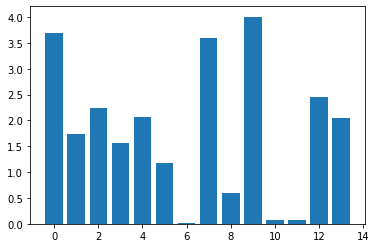

In [63]:
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))

# Gráfica de los scores:    
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

#### e. Implementación de un modelo de regresión logística con todas variables seleccionadas por correlación:

De forma similar a la regresión lineal, se evidenció estadísticamente que las variables: periodo, departamento, situación económica, dedicación a la lectura e internet, y énfasis de la institución, no aportan mayor significancia al modelo, por lo que se retiran para nuevamente volver a correr la regresión.

In [64]:
saber_final_1 = saber_d[["Internet", "Computador", "Videojuegos", "Libros", "Tipo", "Ubicacion", "Estrato", "Edad", "Puntaje_bin"]]
saber_final_1.head()

,Internet,Computador,Videojuegos,Libros,Tipo,Ubicacion,Estrato,Edad,Puntaje_bin
SB11201910008548,1,1,0,0,1,1,4,21,0
SB11201910004475,1,0,0,1,1,1,3,23,0
SB11201910011427,1,0,1,0,1,1,2,20,0
SB11201910041975,1,1,0,0,1,1,2,27,0
SB11201910014490,1,1,1,3,0,1,6,21,1


In [65]:
regresion(saber_final_1,"logistica", "Puntaje_bin")[0]

/Users/anamariaaramendiz/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7429976391042566

#### Conclusión del modelo

De acuerdo con el score que arroja el modelo retirando las variables poco significativas, el puntaje sólo es explicado en un 74.22%, para cuando un estudiante está por encima/debajo de 250 puntos, por lo que el modelo con regresión logística con todas las variables iniciales es ligeramente mejor que este modelo reducido, por lo que estas variables estarían influyendo en el modelo.

#### f. Implementación de un modelo de probabilidad lineal con todas variables:

In [66]:
base_3 = saber_d

base_3["Puntaje_bin"] = np.where(base_3["Puntaje"] >= 277, 1, 0)
base_3 = base_3.drop(["Puntaje"],axis=1)
base_3.head()

,Periodo,Departamento,Internet,Computador,Videojuegos,Libros,Economia,DLectura,DInternet,Tipo,Enfasis,Ubicacion,Estrato,Edad,Puntaje_bin
SB11201910008548,0,31,1,1,0,0,1,1,1,1,3,1,4,21,0
SB11201910004475,0,31,1,0,0,1,1,4,1,1,3,1,3,23,0
SB11201910011427,0,31,1,0,1,0,0,4,0,1,3,1,2,20,0
SB11201910041975,0,31,1,1,0,0,0,4,3,1,3,1,2,27,0
SB11201910014490,0,4,1,1,1,3,0,1,1,0,0,1,6,21,1


In [67]:
regresion(base_3,"lineal", "Puntaje_bin")[0]

0.16341829528480734

#### Conclusión del modelo

De acuerdo al R2 del modelo probit (16.56%), en definitiva un modelo de regresión lineal, incluso probit, no aporta una significancia global aceptable.

### Generalidades

- Para este caso de estudio, el modelo de regresión logística ofrece mejor explicación de las características socio-demográficas escogidas para predecir si éstas impactan en el desemepeño del puntaje global.

- Clasificar el puntaje binario donde 1 esté relacionado a un cuantil, entre más alto sea el cuantil, más alto es el score que arroja el modelo de regresión logística.

- Las variables periodo de presentación de la prueba, departamento, situación económica, dedicación a la lectura e internet, y énfasis de la institución académica (ej. técnico, académico, etc.), no representan mayor significancia para explicar el rendimiento de un estudiante en la prueba, incluso la ubicación (rural/urbana) y tener consola de videojuegos, tampoco alcanzan una significancia elevada en el modelo; éstas últimas dos variables, junto con tener internet, tener computador (puede que el estudiante tenga internet pero use el celular u otros dispositivos para conexión), tener libros en la casa, el tipo de institución (pública/privada), el estrato y la edad del estudiante, aparentan explicar el rendimiento de un estudiante en la prueba.

# 4. Desarrollar una herramienta interactiva de análisis

Esta misión consiste en desarrollar una herramienta interactiva sencilla (que sea relevante en el contexto del problema) a partir de alguno de los análisis realizados en las secciones 2 o 3.

Pautas generales:
* Seleccionar uno de los análisis previos que pueda verse enriquecido con alguna característica de interactividad.
* Seleccionar los parámetros que el usuario podrá cambiar.
* Desarrollar las funciones que se deben ejecutar con cada acción del usuario.
* Utilizar los paquetes `ipywidgets` o `panel` para implementar la herramienta.

Pregunta guía:
* ¿Cuál(es) es la pregunta que el usuario podrá hacerle a la herramienta, y cómo aporta al análisis?
* ¿Qué aprendizajes clave puede explorar u obtener el usuario con esta herramienta basada en los datos?

El entregable de esta misión es la herramienta implementada, acompañada de las instrucciones necesarias para que un usuario la pueda utilizar.

#### a. Herramienta interactiva para correr modelos de regresión, cambiando el cuantil de medición del puntaje y seleccionando modelo lineal o logit:

Esta herramienta generará un modelo de regresión lineal ó logística, con datos elegidos por el usuario como:
- Cuantil de medición de probabilidad de éxito (1), siendo el valor un umbral de calificación como una prueba buena o mala.
- Tipo de modelo de regresión: lineal ó logística.

In [68]:
titulo = '# Desempeño del modelo de regresión'

seleccion_c = widgets.FloatSlider(min = 0.0,max = 1.0, step = 0.1, description = "Cuantil:", disabled = False)

seleccion_lm = widgets.Dropdown(options=["Lineal", "Logistica"],value = "Lineal",description = "Tipo regresión", disabled = False,)

- Función que se encarga de la interactividad del tablero:

In [69]:
@pn.depends(seleccion_c, seleccion_lm)

def interactividad(seleccion_c, seleccion_lm): 
    
    base_panel = saber_d[["Puntaje", "Edad", "Estrato","Internet", "Computador", "Videojuegos", "Libros", "Ubicacion", "Tipo"]]
    Cuantiles = int(saber_d.Puntaje.dropna().quantile([seleccion_c]).values)
    
    if seleccion_lm == "Lineal": 
        resultado = regresion(base_panel,"lineal", "Puntaje")[0]
    
    elif seleccion_lm == "Logistica":
        
        base_panel["Puntaje_bin"] = np.where(base_panel["Puntaje"] >= Cuantiles, 1, 0)
        base_logit = base_panel.drop(["Puntaje"],axis=1)  
        
        resultado = regresion(base_logit,"logistica", "Puntaje_bin")[0]
    
    return resultado

In [70]:
tablero_control = pn.Row(pn.Column(titulo, seleccion_c,seleccion_lm), pn.Column(interactividad))

#### b. Tablero control: 

In [72]:
tablero_control.servable()

Row
    [0] Column
        [0] Markdown(str)
        [1] IPyWidget(FloatSlider)
        [2] IPyWidget(Dropdown)
    [1] Column
        [0] ParamFunction(function)

### Generalidades

- En definitiva, una buena selección de las variables en la regresión lineal, garantiza un mejor ajuste y que estas variables ayuden a explicar el puntaje para aportar en su predicción, por lo que aunque se cambie el cuantil para el probit, el desempeño de la regresión es de 23%.

- En cuanto al modelo logit, cambiar el cuantil si genera diferentes comportamientos del desempeño del modelo, por lo que la medida de éxito, es decir, el punto de corte que define un buen puntaje versus uno malo, si influencia el ajuste y en los extremos, estará desfasado.

- Con el ejercicio realizado, se puede volver a cargar toda la base completa, es decir, con todas las variables para hacer el descarte por correlación de forma matemática y no visual, y en adelante volverlo a correr para validar si hay algunas variables importantes que no se hayan tenido en cuenta.